## **Problem Statement**

Forest fires pose a significant threat to the environment, leading to loss of biodiversity, destruction of ecosystems, and economic damage. In Algeria, forest fires have been recurrent, especially during dry seasons, causing widespread devastation. Predicting fire intensity using meteorological and environmental factors can enhance early warning systems and improve fire management strategies.

This project aims to develop a machine learning model to predict the Fire Weather Index (FWI)—a key indicator of fire intensity—based on historical weather data. By analyzing critical factors such as temperature, humidity, wind speed, and rainfall, the model will provide insights into fire-prone conditions, helping authorities allocate resources effectively and mitigate fire risks.

## **Objectives**

1. **Data Collection & Preprocessing**  
   - Load and clean the Algerian forest fire dataset.  
   - Handle missing values and format data appropriately.  

2. **Exploratory Data Analysis (EDA)**  
   - Identify trends, patterns, and correlations between meteorological features and FWI.  
   - Visualize key relationships between variables to gain insights.  

3. **Feature Engineering**  
   - Select relevant features influencing the Fire Weather Index.  
   - Apply transformations if necessary to improve model performance.  

4. **Model Selection & Training**  
   - Train various regression models such as **Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regression** to predict FWI.  

5. **Performance Evaluation**  
   - Compare models using metrics like **R² Score and Mean Absolute Error (MAE)**.  

6. **Insights & Visualization**  
   - Present findings using data visualization techniques to highlight weather conditions that contribute to high FWI values.  

## **Dataset Description**

The dataset contains historical records of **forest fires in Algeria** along with meteorological and fire-related indices. Each record includes details on weather conditions, fire indices, and whether a fire occurred.  

#### **Dataset Columns:**  

- **Date-related Features:**  
  - **Day**: The day of the month when the observation was recorded.  
  - **Month**: The month of the year when the observation was recorded.  
  - **Year**: The year of the recorded observation.  

- **Meteorological Features:**  
  - **Temperature**: The temperature (°C) recorded on the given day.  
  - **RH (Relative Humidity)**: The percentage of humidity in the air.  
  - **Ws (Wind Speed)**: Wind speed in km/h.  
  - **Rain**: The amount of rainfall (mm) recorded.  

- **Fire Weather Indices (FWI) System Features:**  
  These indices are part of the **Canadian Forest Fire Weather Index (FWI) System**, which estimates fire danger based on weather conditions.  
  - **FFMC (Fine Fuel Moisture Code)**: Indicates moisture content of surface fuels (higher values mean drier fuels).  
  - **DMC (Duff Moisture Code)**: Represents moisture content in decomposing organic layers, influencing fire sustainability.  
  - **DC (Drought Code)**: Represents long-term drying conditions of deep forest layers.  
  - **ISI (Initial Spread Index)**: Measures fire spread potential based on wind and fine fuel moisture.  
  - **BUI (Buildup Index)**: Combines DMC and DC to indicate total fuel availability.  
  - **FWI (Fire Weather Index)**: The overall index representing fire intensity potential.  

- **Target Variable:**  
  - **Classes**: Indicates whether a fire occurred (**"fire"** or **"not fire"**).  

#### **Dataset Source:**  
- Kaggle - https://www.kaggle.com/datasets/mbharti321/algerian-forest-fires-dataset-updatecsv

## **Dataset Overview**  

The dataset contains **244 instances** of forest fire records collected from **two regions in Algeria**:  
- **Bejaia Region** (Northeast Algeria)  
- **Sidi-Bel-Abbes Region** (Northwest Algeria)  

The data was recorded during the **summer fire season** from **June 2012 to September 2012**. It captures meteorological conditions, fire weather indices, and fire occurrence classification.  

#### **Dataset Composition**  
- **Total Instances**: **244**  
- **Fire Occurrences**: **138 instances (~56.6%)**  
- **No Fire Cases**: **106 instances (~43.4%)**  
- **Time Period**: **June to September 2012**  
- **Features**: **11 attributes** (meteorological and fire-related indices)  
- **Target Attribute**: **Fire occurrence classification** (`Fire` / `No Fire`)  

#### **Significance of the Dataset**  
This dataset is crucial for analyzing **forest fire risks** and understanding how **weather conditions** influence fire occurrences. It can be used for:  
- **Predictive modeling** of fire outbreaks.  
- **Analyzing the impact of weather conditions** on fire intensity.  
- **Developing early warning systems** for fire-prone regions.  

## **1. Importing Libraries**

In [638]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

# Feature scaling
from sklearn.preprocessing import StandardScaler

# for pickle the models
import pickle

# For warnings
import warnings
warnings.filterwarnings('ignore')

## **2. Loading Dataset**

In [496]:
# List of CSV files
csv_files = ["Bejaia Region ForestFire Dataset.csv", "Sidi-Bel Abbes Region ForestFire Dataset.csv"]

# Read and merge both CSV files
dataset = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [498]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [499]:
dataset.shape

(244, 14)

## **3. Data Cleaning**

In [501]:
# missing values
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [503]:
dataset = dataset.dropna()

In [504]:
dataset.duplicated().sum()

0

In [506]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 28.5+ KB


In [508]:
dataset.loc[:122, 'Region'] = 0
dataset.loc[122:, 'Region'] = 1
df = dataset

In [510]:
df[['Region']] = df[['Region']].astype(int)

In [512]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [514]:
# fixing the space in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [515]:
# changing required columns as integer datatype
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [516]:
# changing required columns as float datatype
objects = [feature for feature in df.columns if df[feature].dtypes == 'object']

for column in objects:
    if column != 'Classes':
        df[column]= df[column].astype(float)

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 31.8+ KB


In [518]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [519]:
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
187,5,8,2012,34,42,17,0.1,88.3,23.6,52.5,19.0,23.5,12.6,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
19,20,6,2012,30,80,16,0.4,59.8,3.4,27.1,0.9,5.1,0.4,not fire,0
154,3,7,2012,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2,fire,1
92,1,9,2012,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,not fire,0
111,20,9,2012,28,84,18,0.0,83.8,13.5,49.3,4.5,16.0,6.3,fire,0
144,23,6,2012,33,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,not fire,1
161,10,7,2012,34,51,16,3.8,77.5,8.0,9.5,2.0,7.7,1.3,not fire,1
43,14,7,2012,34,61,13,0.6,73.9,7.8,22.9,1.4,8.4,0.8,not fire,0
56,27,7,2012,36,48,13,0.0,90.3,22.2,108.5,8.7,29.4,15.3,fire,0


In [520]:
# save the cleaned dataset
df.to_csv('Algerian_Forest_Fires_Cleaned_Dataset.csv', index=False)

## **4. Exploratory Data Analysis**

In [522]:
# drop day, monthe and year
df = df.drop(['day','month','year'], axis=1)

In [523]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [524]:
# Encoding the categories in classes
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [527]:
df.sample(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
110,29,57,14,0.0,89.3,12.5,41.3,7.8,14.2,9.7,1,0
195,35,34,16,0.2,88.3,16.9,45.1,7.5,17.5,10.5,1,1
12,27,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2,0,0
229,33,26,13,0.0,93.9,21.2,59.2,14.2,22.4,19.3,1,1
238,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0,1


In [528]:
# categories in classes
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

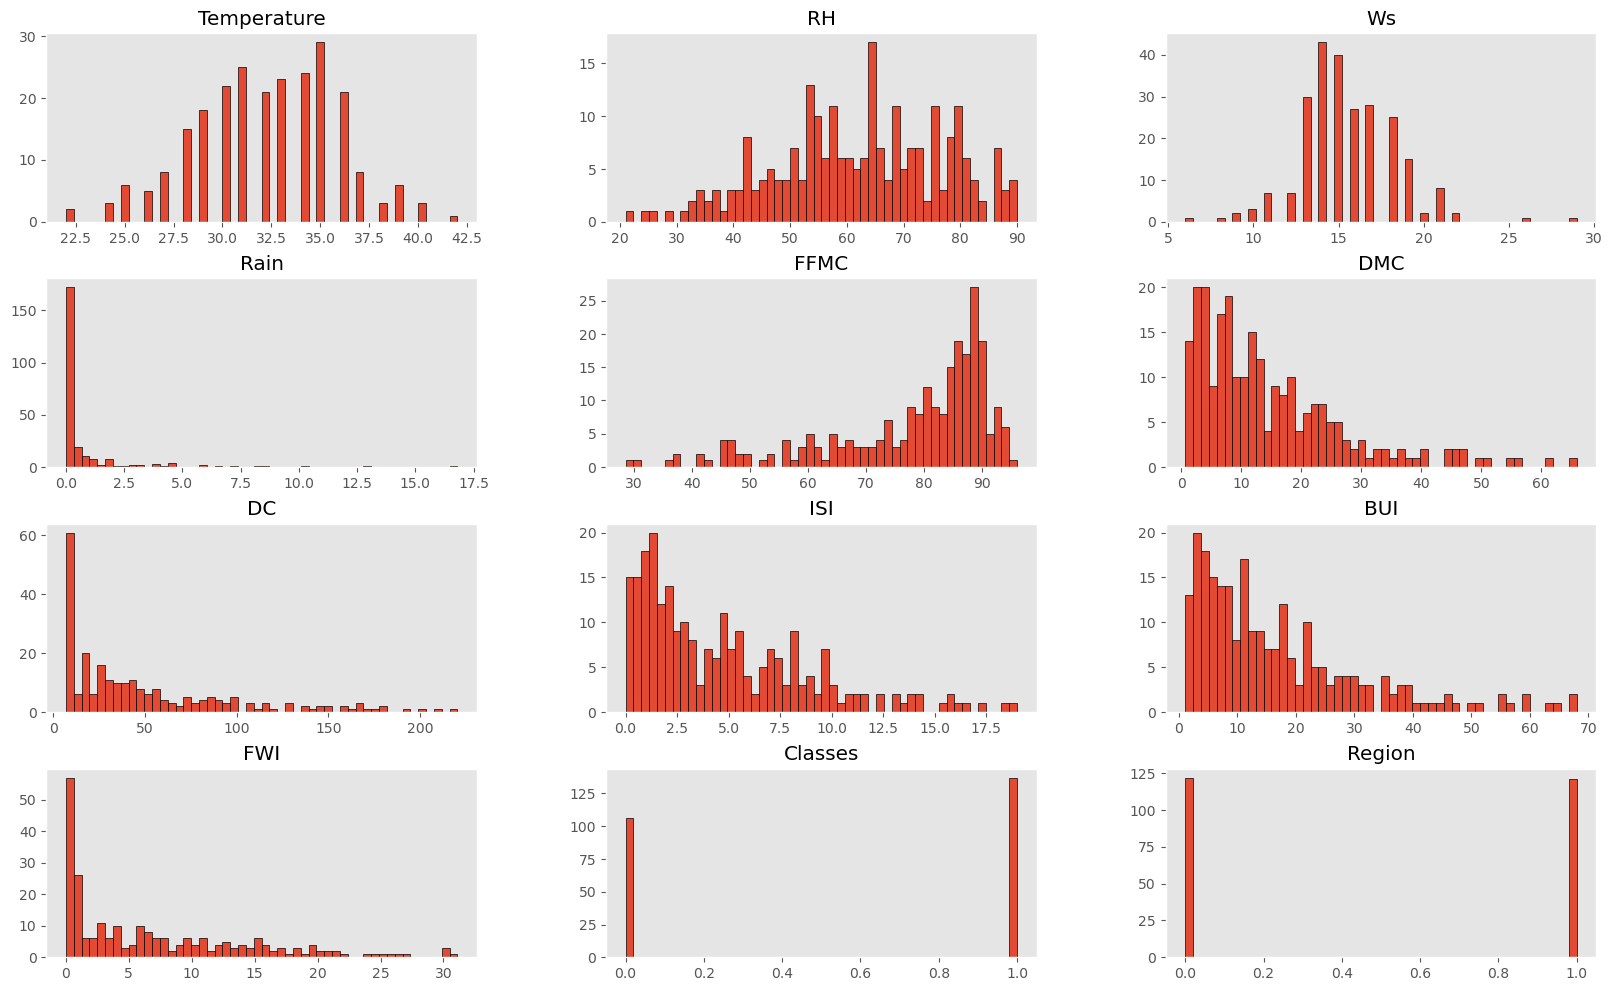

In [529]:
# density plot for all features
plt.style.use('ggplot') 
df.hist(bins=50, figsize=(20, 12), edgecolor='black', grid=False)
plt.show()

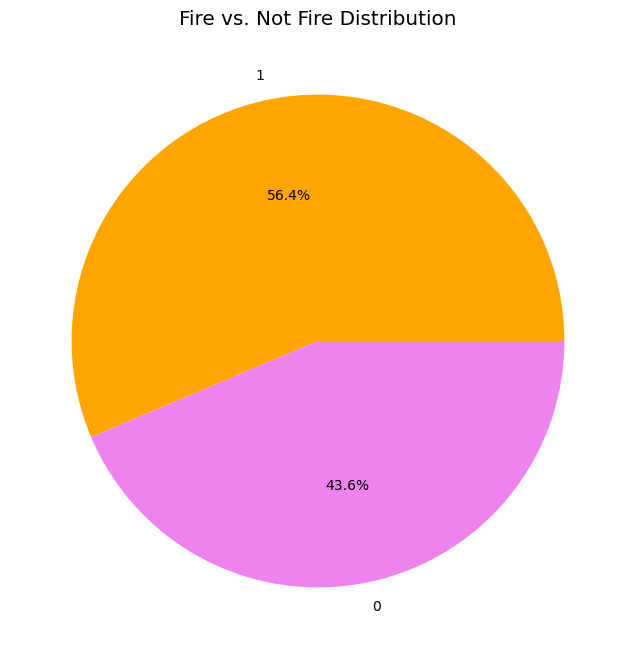

In [530]:
# pie chart
# Count occurrences of each class
class_counts = df['Classes'].value_counts()
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['orange', 'violet'])
plt.title('Fire vs. Not Fire Distribution')
plt.show()

In [532]:
# coorelation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


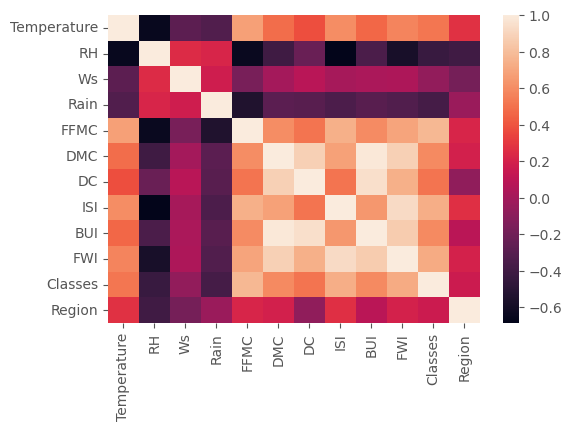

In [545]:
# coorelation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr())
plt.show()

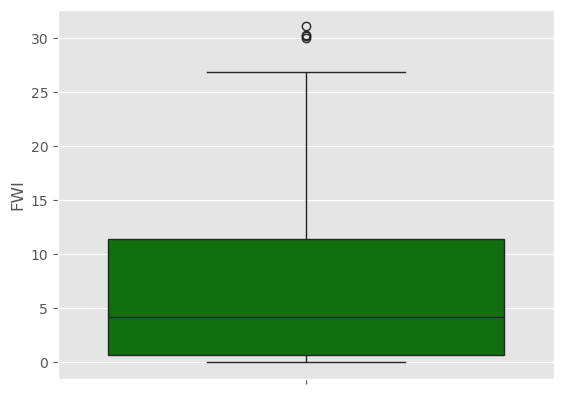

In [546]:
# Box Plots
sns.boxplot(df['FWI'], color='green')
plt.show()

## **5. Feature Selection**

In [548]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)

In [550]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [551]:
# feature selection based on correlattion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


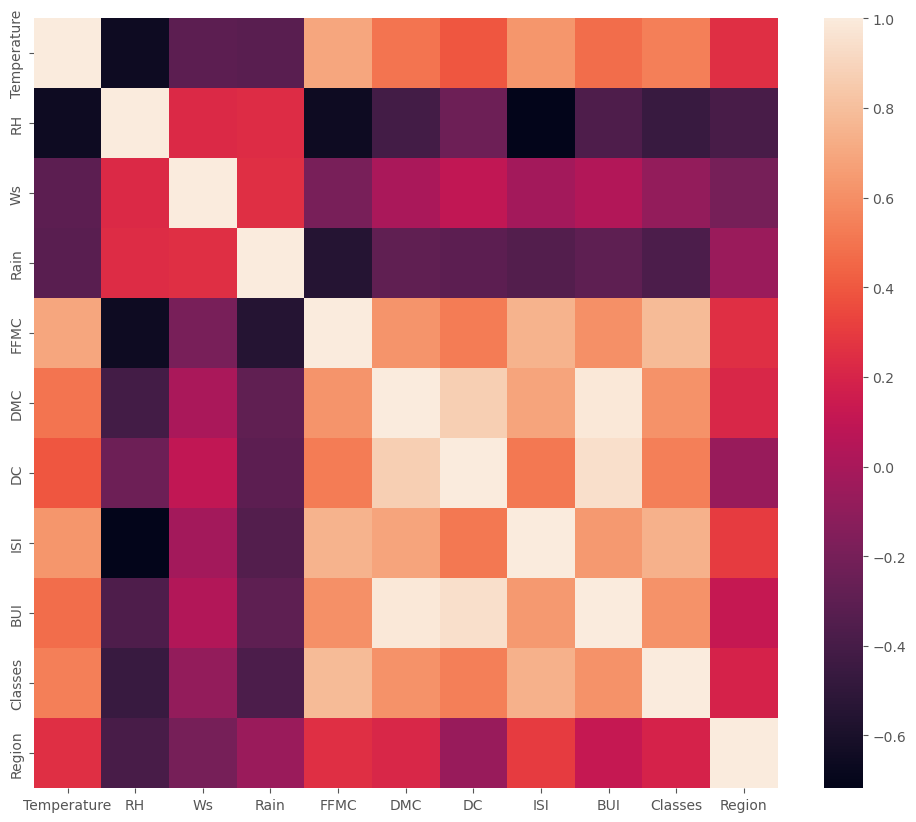

In [552]:
# check for multicolinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr)
plt.show()

In [553]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr() 

    for i in range(len(corr_matrix.columns)): 
        for j in range(i): 
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)  
                
    return col_corr

In [554]:
# threshold Domain Expertise
corr_features = correlation(X_train, 0.85)

In [558]:
# drop the features BUI and DC, correlation is more than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [559]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

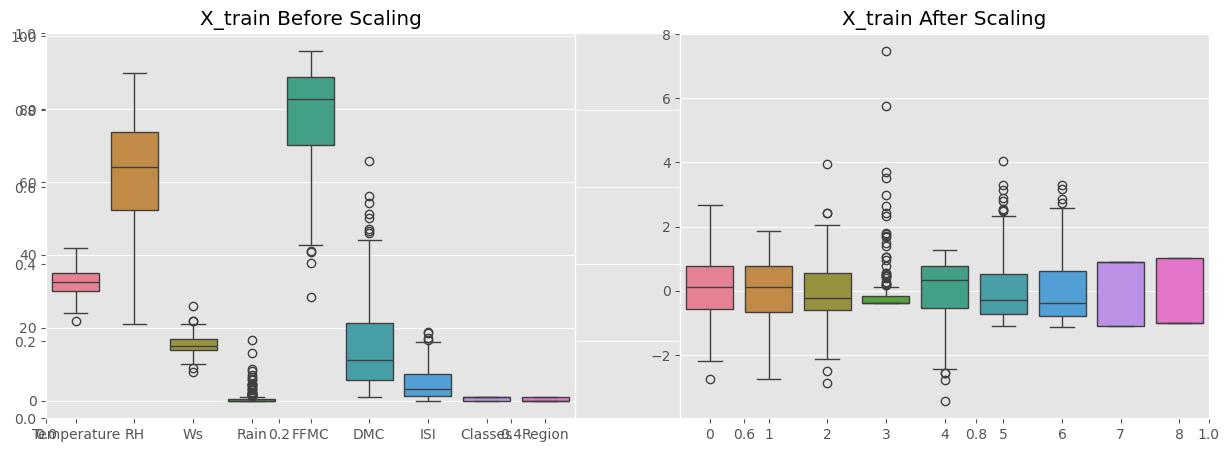

In [578]:
# ploting box plot to understand effect of standardization
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.show()

## **6. Model Training**

### **1. Linear Regression**

Mean Absolute Error: 0.5468236465249993
R2 Score: 0.9847657384266951


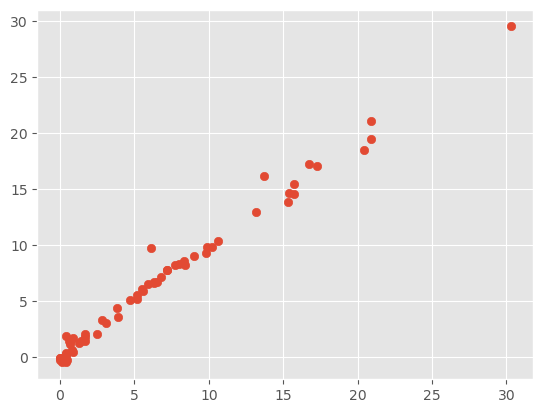

In [592]:
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)
plt.show()

### **2. Lasso Regression**

Mean Absolute Error: 1.1331759949144085
R2 Score: 0.9492020263112388


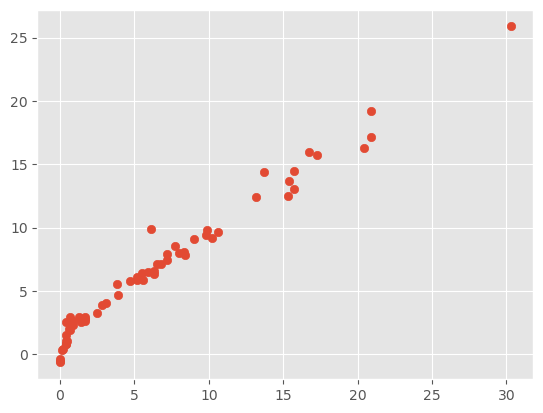

In [599]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)
plt.show()

#### Lasso Cross Validation

Mean Absolute Error: 0.6199701158263432
R2 Score: 0.9820946715928275


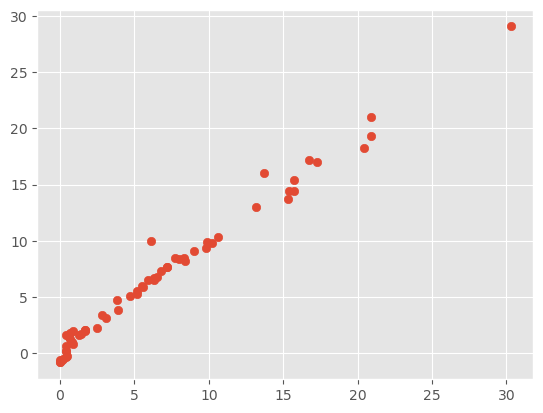

In [621]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)
plt.show()

### **3. Ridge Regression**

Mean Absolute Error: 0.5642305340105712
R2 Score: 0.9842993364555513


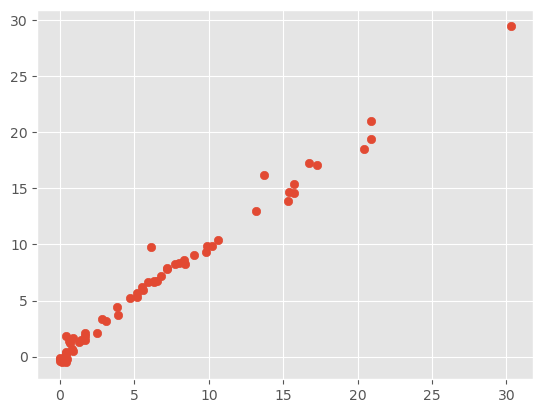

In [603]:
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)
plt.show()

#### Ridge Cross Validation

Mean Absolute Error: 0.5642305340105712
R2 Score: 0.9842993364555513


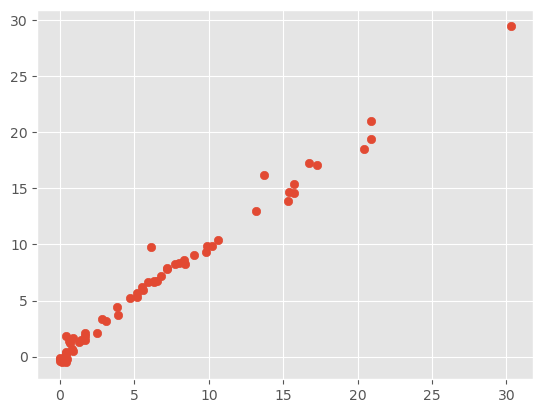

In [626]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)
plt.show()

### **4. ElasticNet Regression**

Mean Absolute Error: 1.8822353634896
R2 Score: 0.8753460589519703


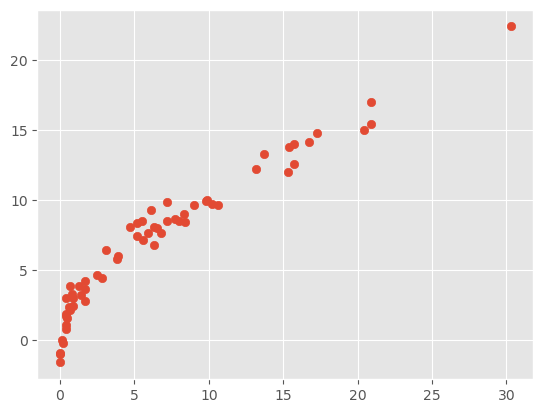

In [608]:
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)
plt.show()

#### ElasticNet Cross Validation

Mean Absolute Error: 0.6575946731430905
R2 Score: 0.9814217587854941


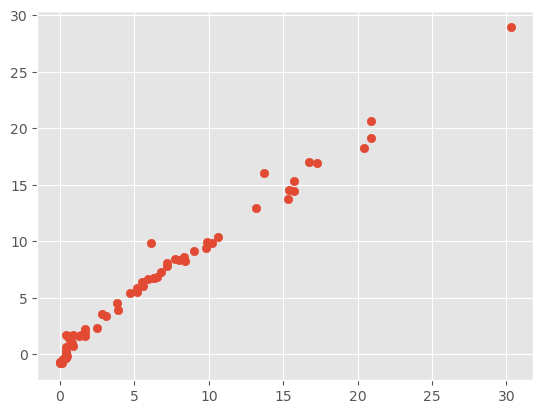

In [631]:
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)
plt.show()

## **7. Pickle the Models**

In [658]:
# pickle the scaler and ridge models
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))